In [19]:
'''
Archivo en GitHub FALLIDO

https://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega.ipynb

El archivo se encuentra en la carpeta primer_taller https://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega_taller_uno.ipynb

'''

'\nArchivo en GitHub:\n\nhttps://github.com/davidlealo/diplomadodatascienceuc2023/blob/main/primer_taller/entrega.ipynb\n\n'

# Pregunta 1
Cargue la base de datos bike.csv. Realice las siguientes procesos de limpieza

Transforme a factor las variables categóricas.
Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada. Use las siguientes fórmulas respectivamente:
(47*temp-8).
(66*atemp-16).
Transforme la variable humedad a porcentaje (multiplique la variable por 100).
Transforme la velocidad del viento a millas por hora (multiplique por 67 el valor de la variable normalizada).

In [20]:
# Importar pandas
import pandas as pd

In [21]:
# Cargar base de datos bike.csv en la variable data_bikes
data_bikes = pd.read_csv('data/bikes.csv')

In [22]:
print('Shape')
data_bikes.shape

Shape


(731, 14)

In [23]:
# Análisis iniciales del df
print('__________')
print('Info')
data_bikes.info()

__________
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        731 non-null    object 
 1   season      731 non-null    int64  
 2   year        731 non-null    int64  
 3   month       731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weather     731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  humidity    731 non-null    float64
 11  windspeed   731 non-null    float64
 12  registered  731 non-null    int64  
 13  Target      731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [24]:
# Transforme a factor las variables categóricas.
categorical_vars = ['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weather']
for var in categorical_vars:
    data_bikes[var] = data_bikes[var].astype('category')


In [25]:
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        731 non-null    object  
 1   season      731 non-null    category
 2   year        731 non-null    category
 3   month       731 non-null    category
 4   holiday     731 non-null    category
 5   weekday     731 non-null    category
 6   workingday  731 non-null    category
 7   weather     731 non-null    category
 8   temp        731 non-null    float64 
 9   atemp       731 non-null    float64 
 10  humidity    731 non-null    float64 
 11  windspeed   731 non-null    float64 
 12  registered  731 non-null    int64   
 13  Target      731 non-null    int64   
dtypes: category(7), float64(4), int64(2), object(1)
memory usage: 46.5+ KB


In [26]:
# Cambiar a fecha variable 'date' a formato datetime año-mes-día
data_bikes['date'] = pd.to_datetime(data_bikes['date'], format='%Y-%m-%d')

In [27]:
# Nuevo info con data como fecha
data_bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    category      
 2   year        731 non-null    category      
 3   month       731 non-null    category      
 4   holiday     731 non-null    category      
 5   weekday     731 non-null    category      
 6   workingday  731 non-null    category      
 7   weather     731 non-null    category      
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  registered  731 non-null    int64         
 13  Target      731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(4), int64(2)
memory usage: 46.5 KB


In [28]:
# Transforme las variables temp y atemp a grados celsius, ya que se encuentran en escala normalizada
data_bikes['temp'] = 47 * data_bikes['temp'] -8 #Transformación temperatura
data_bikes['atemp'] = 66 * data_bikes['atemp'] -16 #Transformación sensación térmica

In [29]:
# Transforme la variable humedad a porcentaje (multiplique la variable por 100)
data_bikes['humidity'] = data_bikes['humidity'] * 100

In [30]:
# Transforme la velocidad del viento a millas por hora 
# (multiplique por 67 el valor de la variable normalizada)
data_bikes['windspeed'] = data_bikes['windspeed'] * 67

# Pregunta 2
Realice un gráfico del número de arriendos de bicicletas vs temperatura, además, añada una curva de regresión lineal. ¿Cuál es la relación entre el número de arriendos con la temperatura?



In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

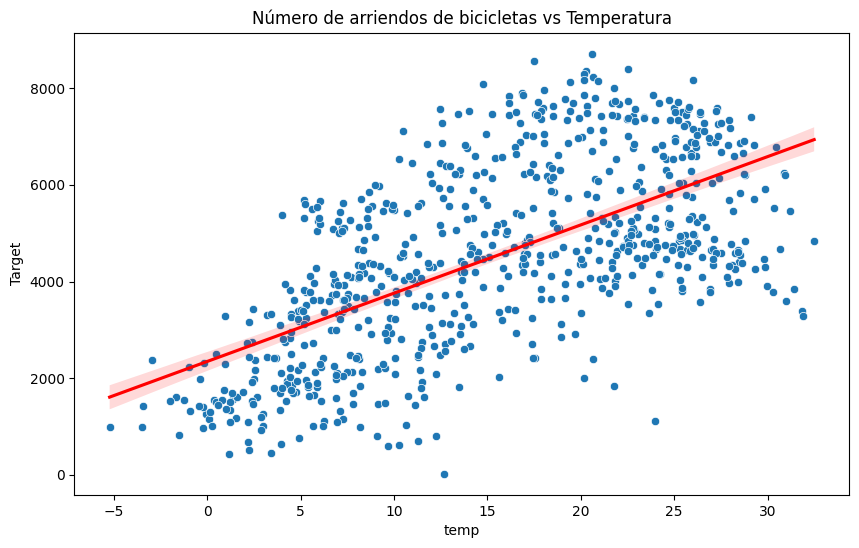

In [32]:
# Realizar el gráfico según las instrucciones 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_bikes, x='temp', y='Target')
sns.regplot(data=data_bikes, x='temp', y='Target', scatter=False, color='red')  # Curva de regresión lineal
plt.title("Número de arriendos de bicicletas vs Temperatura")
plt.show()

### ¿Cuál es la relación entre el número de arriendos con la temperatura? ###
Al aumentar la temperatura, también aumenta la cantidad de arriendos. La curva de regresión lineal demuestra que existe esa tendencia entre el aumento de temperatura y arriendos de bicicletas. Encontrando una mayor incertidumbre en los extremos de menor o mayor temperatura, lo que parece creíble ante la experiencia que con menos de 5 grados o más de 30 las personas pueden tener menos ganas de salir a andar en bicicleta 

# Pregunta 3
¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años?, realice en un mismo gráfico la relación entre el número de arriendo vs temperatura para los dos años, añada las curvas de regresión lineal.

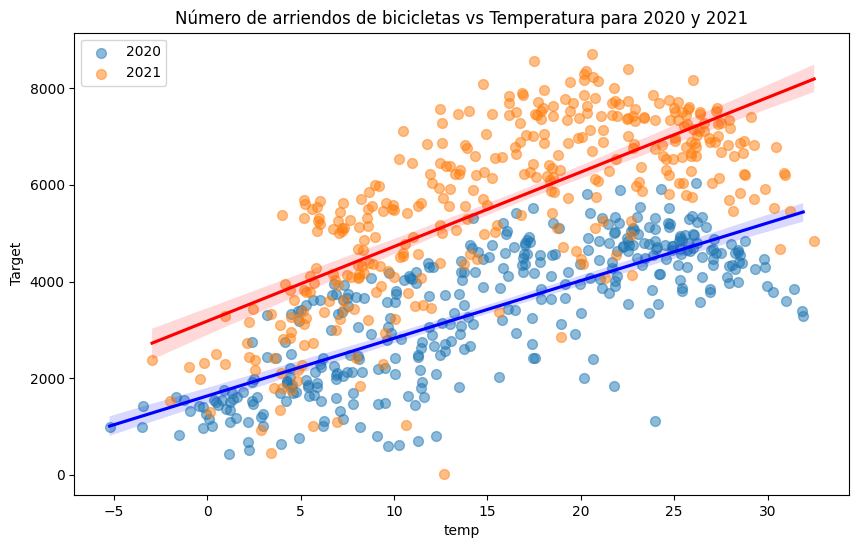

In [33]:
plt.figure(figsize=(10, 6))

# Gráfica para el año 2020
sns.regplot(data=data_bikes[data_bikes['year'] == 0], x='temp', y='Target', label='2020', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'blue'})

# Gráfica para el año 2021
sns.regplot(data=data_bikes[data_bikes['year'] == 1], x='temp', y='Target', label='2021', scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'}, scatter=True)

plt.title("Número de arriendos de bicicletas vs Temperatura para 2020 y 2021")
plt.legend()
plt.show()

In [34]:
import statsmodels.api as sm

# Separar los datos por año
data_2020 = data_bikes[data_bikes['year'] == 0]
data_2021 = data_bikes[data_bikes['year'] == 1]

# Ajustar la regresión lineal para 2020
X_2020 = sm.add_constant(data_2020['temp'])  # Añadir una constante para el término de intercepción
model_2020 = sm.OLS(data_2020['Target'], X_2020).fit()

# Ajustar la regresión lineal para 2021
X_2021 = sm.add_constant(data_2021['temp'])
model_2021 = sm.OLS(data_2021['Target'], X_2021).fit()

# Imprimir los coeficientes (pendientes) para cada año
print("Coeficiente (pendiente) para 2020:", model_2020.params['temp'])
print("Coeficiente (pendiente) para 2021:", model_2021.params['temp'])


Coeficiente (pendiente) para 2020: 119.32616881805956
Coeficiente (pendiente) para 2021: 154.246382971884


### ¿Es la relación entre la temperatura y el número de bicicletas arrendas igual en los dos años? ###
Existe una relación similar en la relación entre el aumento de la temperatura con el de las bicicletas: a mayor temperatura, mayor cantidad de arriendos.
Pero el año 2021 por cada grado celsius de aumento, la cantidad de arriendos es mayor que el 2020, esto lo podemos encontrar por sus pendientes: 

> Coeficiente (pendiente) para 2020: 119.32616881805956

> Coeficiente (pendiente) para 2021: 154.246382971884

Esto indica que aunque la tendencia es al alza en ambos años, el 2021 es mayor

# Pregunta 4
Por selección forward, construya un modelo sin considerar las variables

date
month
registered
Interpreta el factor asociado a la Temperatura y días feriados.

In [35]:
# Primero, necesitamos descartar las variables (date, month, registered)
data_bikes = data_bikes.drop(columns=['date', 'month', 'registered'])

In [36]:
# Variables disponibles para el modelo
variables = data_bikes.columns.tolist()
target = 'Target'
variables.remove(target)

selected_variables = []  # Aquí almacenamos las variables seleccionadas
best_score = 1e20  # Inicializamos el score con un valor alto

for i in range(len(variables)):
    scores_with_candidates = []
    for candidate in variables:
        if candidate not in selected_variables:
            # Ajustamos el modelo con la variable candidata
            X = sm.add_constant(data_bikes[selected_variables + [candidate]])
            y = data_bikes[target]
            model = sm.OLS(y, X).fit()
            rss = ((model.predict(X) - y) ** 2).sum()
            scores_with_candidates.append((rss, candidate))
    scores_with_candidates.sort()
    if scores_with_candidates[0][0] < best_score:
        best_score = scores_with_candidates[0][0]
        selected_variables.append(scores_with_candidates[0][1])

final_model = sm.OLS(data_bikes[target], sm.add_constant(data_bikes[selected_variables])).fit()


In [37]:
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     285.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          5.98e-243
Time:                        19:26:47   Log-Likelihood:                -5983.6
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     720   BIC:                         1.204e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2704.2717    237.799     11.372      0.0

### Interpreta el factor asociado a la Temperatura y días feriados ###
Seguimos manteniendo la tendencia de relación entre el aumento de la temperatura y el arriendo de bicicletas. La relación es de 42.8632 
Pero el p-valor de 0.153 no nos permite refutar la hipótesis nula

Respecto a los días feriados, el coef nos muestra que los días feriados tenemos 539.9414 menos arriendos que en días no feriados. Al tener un p-valor de 0.008 podemos afirmar que esto es lo suficientemente confiable, por lo tanto, estadísticamente significativo. 

# Pregunta 5
Utilice los residuos del modelo elegido para estudiar la validez de los supuestos:

Normalidad.
Independencia
Igualdad de varianzas (homocedasticidad)
¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones.

In [38]:
import scipy.stats as stats

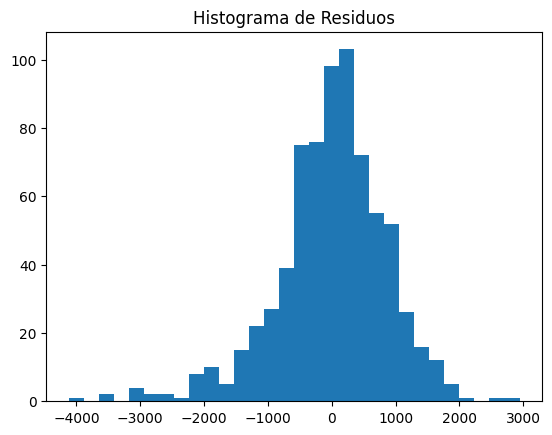

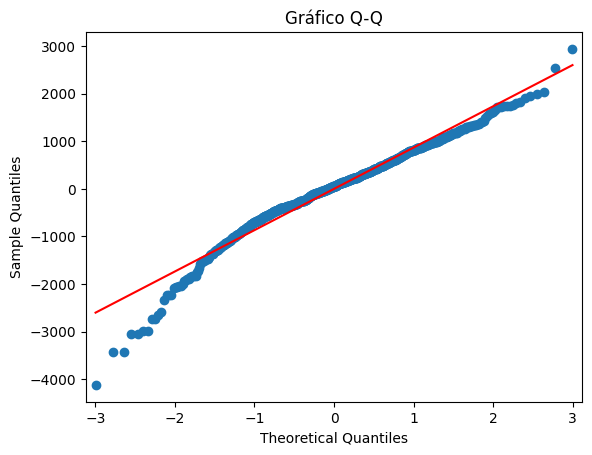

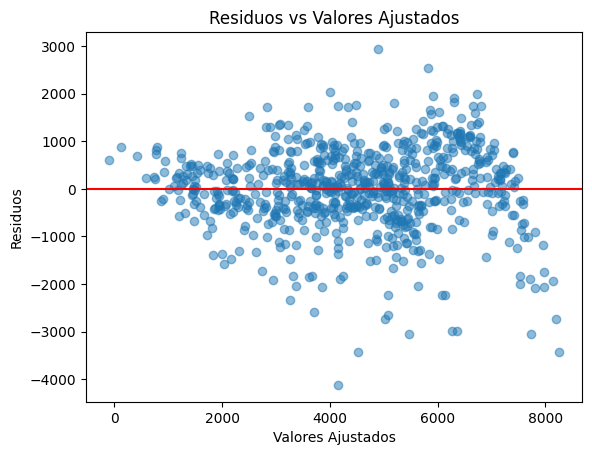

In [39]:
# Usando final_model como nombre del modelo
residuos = final_model.resid
valores_ajustados = final_model.fittedvalues

# Histograma de residuos
plt.hist(residuos, bins=30)
plt.title("Histograma de Residuos")
plt.show()

# Gráfico Q-Q
sm.qqplot(residuos, line='s')
plt.title("Gráfico Q-Q")
plt.show()

# Residuos vs. Valores Ajustados
plt.scatter(valores_ajustados, residuos, alpha=0.5)
plt.title("Residuos vs Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [40]:
from scipy.stats import kstest

# Residuos en la variable con el mismo nombre 
residuos_estandarizados = (residuos - residuos.mean()) / residuos.std()

# Aplicar KS test
resultado = kstest(residuos_estandarizados, 'norm')

display(resultado)


KstestResult(statistic=0.0699010360384984, pvalue=0.0014994213055341359, statistic_location=-0.5410073995637149, statistic_sign=-1)

In [41]:
resultado.pvalue < 0.05

True

In [42]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Modelo ajustado con el nombre final_model
residuos = final_model.resid
valores_ajustados = final_model.fittedvalues
variables_independientes = final_model.model.exog  # Esto recoge las variables independientes del modelo 

bp_test = het_breuschpagan(residuos, variables_independientes)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
result = dict(zip(labels, bp_test))

print(result)


{'LM Statistic': 70.9325540297948, 'LM-Test p-value': 2.92802452414378e-11, 'F-Statistic': 7.737306121253184, 'F-Test p-value': 7.801243778288495e-12}


### ¿Es un modelo adecuado estadísticamente? Justifique sus afirmaciones ###

A continuación compartimos los resultados de las pruebas
1. **Normalidad**:

Kolmogorov-Smirnov Test Result:
> `statistic=0.0699010360384979`

> `pvalue=0.0014994213055342896`

Interpretación:
Dado que el p-valor es significativo (0.0015 < 0.05), rechazamos la hipótesis nula (H0) y aceptamos la hipótesis alternativa (H1).

Decisión:
Los residuos **no siguen una distribución normal**.

2. **Homocedasticidad**:

Breusch-Pagan Test Result:
> `LM-Test p-value: 2.928024524144319e-11`

Interpretación:
Un p-valor muy pequeño (mucho menos de 0.05) sugiere que rechazamos la hipótesis nula (H0) en favor de la hipótesis alternativa (H1).

Decisión:
Los residuos presentan **heterocedasticidad**.

3. **Autocorrelación**:

Durbin-Watson statistic:
> `0.953` 

Interpretación:
Valores cercanos a 2 indican que no hay autocorrelación en los residuos. El valor 0.953, es menor a 2, lo que sugiere la presencia de autocorrelación positiva.

Decisión:
Los residuos están **correlacionados** (indicando que hay autocorrelación).

## Resumen:
> Los residuos **no son normales**.

> Los residuos presentan **heterocedasticidad**.

> Hay evidencia de **autocorrelación** en los residuos.



# Pregunta 6
Realice una predicción de arriendos de bicicletas para un día con las siguientes cualidades:
```python

import pandas as pd
pd.DataFrame({'season' : 2,
       'year' : 2021,
       'holiday' : 'feriado',
       'weekday' : 'Sábado',
       'workingday' : 'No laboral',
       'weather' : 'Niebla',
       'temp' : 12,
       'atemp' : 11,
       'humidity' : 66.3,
       'windspeed' : 12.5}, index = ['1'])

```


In [43]:
input_data = pd.DataFrame({
    'const': 1,
    'season': 2,
    'year': 1, # 2021
    'holiday': 1, # feriado
    'weekday': 6, # Sábado
    'workingday': 0, # No laboral
    'weather': 2, # Niebla
    'temp': 12,
    'atemp': 11,
    'humidity': 66.3,
    'windspeed': 12.5
}, index=[1])

prediction = final_model.predict(input_data)
print("Predicción de arriendos de bicicletas:", prediction[1])



Predicción de arriendos de bicicletas: 4136.596620165261


### Predicción ###
Predicción de arriendos de bicicletas: 4136.596620165274

# Pregunta 7
Cargue la base de datos Lluvia_full.csv, codifique la variable LluviaMan como 0 y 1 para los días sin lluvia y con lluvia respectivamente. Además, realice una separación de la base de datos en un set de entrenamiento y set de validación. Utilice una proporción de 80:20 respectivamente. Para poder replicar sus resultados, fije una semilla antes de obtener los indices. Para ello utilice la función random.seed(2023)

In [44]:
# Cargar base de datos
lluvias = pd.read_csv('data/Lluvia_full.csv')

In [45]:
lluvias.shape

(56420, 20)

In [46]:
lluvias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  object 
 18  Koppen       56420 non-null  object 
 19  Esta

In [47]:
display(lluvias.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No,Temperate,Invierno


In [48]:
# Cambiar variable LluviaMan No por 0 y Yes por 1
lluvias = lluvias.replace({'LluviaMan': {'No': 0, 'Yes': 1}})

In [49]:
display(lluvias.head())

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,0,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,0,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,0,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,1,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,0,Temperate,Invierno


In [50]:
lluvias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  int64  
 18  Koppen       56420 non-null  object 
 19  Esta

In [53]:
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [54]:
# Semilla
random.seed(2023)

# Separar la base de datos en sets de entrenamiento y validación
train_data, val_data = train_test_split(lluvias, test_size=0.2, random_state=2023)

# Imprimir los tamaños de los sets de entrenamiento y validación
print("Tamaño del set de entrenamiento:", train_data.shape)
print("Tamaño del set de validación:", val_data.shape)

Tamaño del set de entrenamiento: (45136, 20)
Tamaño del set de validación: (11284, 20)


# Pregunta 8
Realice un modelo de regresión logística para predecir si lloverá mañana utilizando la variable Evaporación, ¿es este Un factor significativo? Intérprete el odd ratio de la evaporación.

In [55]:
import numpy as np

In [56]:
# Seleccionar las variables 
X_train = train_data[['Evaporacion']]
y_train = train_data['LluviaMan']

# Crear e ajustar el modelo de regresión logística
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Obtener el coeficiente para la variable Evaporación
coef_evaporacion = logreg_model.coef_[0][0]

# Calcular el odds ratio
odds_ratio_evaporacion = np.exp(coef_evaporacion)

print("Coeficiente de Evaporación:", coef_evaporacion)
print("Odds Ratio de Evaporación:", odds_ratio_evaporacion)

Coeficiente de Evaporación: -0.10304180718201685
Odds Ratio de Evaporación: 0.9020892588833098


In [57]:
# Agregar una constante a los predictores
X_train_const = sm.add_constant(X_train)

# Crear y ajustar el modelo usando statsmodels
logreg_model_sm = sm.Logit(y_train, X_train_const).fit()

# Obtener las estadísticas del modelo
print(logreg_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.518724
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              LluviaMan   No. Observations:                45136
Model:                          Logit   Df Residuals:                    45134
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                 0.01814
Time:                        19:28:49   Log-Likelihood:                -23413.
converged:                       True   LL-Null:                       -23846.
Covariance Type:            nonrobust   LLR p-value:                3.527e-190
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.7298      0.021    -34.448      0.000      -0.771      -0.688
Evaporacion    -0.1030    

### ¿Evaporación es un factor significativo? ###
La variable evaporación es un factor significativo para predecir la probabilidad de lluvia, lo cual sabemos por su pvalue menor a 0.05. 
Por otro lado, el odds ratio de la variable evaporación menor que 1 indica que al aumentar la evaporación disminuye las probabilidad de lluvia. Esto quiere decir que tienen una relación de dependencia negativa.

# Pregunta 9
Utilizando un método automatizado, ajuste un modelo de regresión logística, utilizando la metodología de dirección both (forward y backward a la vez).

In [58]:
np.asarray(lluvias)

array([[7.6, 19.3, 0.0, ..., 0, 'Subtropical', 'Invierno'],
       [6.8, 19.5, 0.0, ..., 0, 'Subtropical', 'Invierno'],
       [5.5, 13.9, 0.0, ..., 0, 'Temperate', 'Invierno'],
       ...,
       [13.7, 23.4, 3.6, ..., 1, 'Temperate', 'Primavera'],
       [14.0, 26.9, 3.6, ..., 1, 'Temperate', 'Primavera'],
       [8.0, 24.3, 0.0, ..., 1, 'Temperate', 'Primavera']], dtype=object)

In [59]:
lluvias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  object 
 17  LluviaMan    56420 non-null  int64  
 18  Koppen       56420 non-null  object 
 19  Esta

In [ ]:
lluvias.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,0,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,No,0,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,No,0,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,No,1,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,0,Temperate,Invierno


In [60]:
# Cambiar variables object por int (lluviasHoy)
lluvias = lluvias.replace({'LluviaHoy': {'No': 0, 'Yes': 1}})

In [72]:
lluvias['LluviaMan'].unique()

array([0, 1])

In [73]:
lluvias['LluviaHoy'].unique()

array([0, 1])

In [74]:
lluvias['Estacion'].unique()

array([0, 1, 2, 3])

In [75]:
lluvias['Koppen'].unique()

array([1, 0, 2, 4])

In [76]:
lluvias['MinTemp'].unique()

array([ 7.6,  6.8,  5.5,  8.6,  7.9, 11. ,  4.9,  6.3, 10.1,  9.4,  5.7,
        8.3,  6.9, 10.4, 11.5,  3.2, 20.2,  8.7,  7.4,  2.2,  5.6, 10.3,
       13.4, 13.3,  2.6, 19.5,  9.3,  9.5,  2.4,  6.7, -0.5,  4.8, 13.7,
       12.6, 13. ,  0.6, 20.7,  7.7,  7.8, 12.2,  9.9, 21.2, 11.3, 11.7,
        6.4,  1.1,  3.6, 15.8, 10.6,  9.1, 19.3, 11.2,  5.3,  7.1,  4.3,
       15.4,  5.2, 21.9, 13.1,  5.9,  5.4,  1.7, 13.9, 10. ,  7.5, 20. ,
       13.2,  4.1,  4.2,  9.6,  1.4, 17.1,  5. , 11.9, 12.7,  6.6,  8.5,
        4.4, 14.8,  6.5, 18.9, 10.7,  6.2,  3.9, 19. , 11.1, 12.1,  2.1,
        4. , 12.9, 16.9,  9.7,  8.8, 14.3, 10.8, 18.3,  6. ,  3.4, 10.2,
       17.2, 12.5,  1.3, 15.3, 11.4,  8.1,  5.8,  7. ,  4.7,  4.5, 15.2,
       18.7, 10.9,  3. ,  1.9, 20.6, 12.4, 11.8,  0.9,  3.1, 19.2,  5.1,
        8.2,  7.2,  9.2,  7.3, 10.5, 23.3, 12.8, 22.4, 22.7,  8. , 21.6,
       -0.1, 20.4, 22.5,  3.3, 13.5, 24.1,  8.4,  9.8, 23.5, 24.3, 11.6,
       14.2, 14.7, 15. , 24. , 16.3, 23.6, 13.8, 16

In [77]:
lluvias['Evaporacion'].unique()

array([ 3.4,  2.8,  2.2,  1.6,  1.4,  1.8,  3.8,  5.6,  2.4,  3.2,  1.2,
        6.2,  2. ,  0.6,  3.6,  4. ,  7.6,  4.4,  6. ,  0.8,  3. ,  5.2,
        0.2,  2.6,  4.6,  1. ,  4.8,  6.6,  4.2,  5. ,  0.4,  5.4,  8.4,
        7.2,  7.8, 10.6,  7.4,  0. ,  9. ,  6.4,  7. ,  9.6, 10. ,  2.1,
        5.8,  1.1,  6.8,  8. ,  9.4,  9.2,  1.3,  3.1, 44. , 11.2, 10.8,
        8.2,  5.1,  5.7,  8.6, 11. , 13.6, 10.2,  8.8,  6.5,  4.9, 10.4,
        9.8, 11.6, 12. , 12.6, 11.4, 16. , 13. , 14.4, 19. , 15. , 11.8,
        6.7, 14.2, 13.8,  9.1, 14. , 13.2, 13.4, 12.4, 16.4, 12.2, 20.2,
       15.4, 16.2, 14.8, 17.4, 15.8, 12.8,  5.5,  4.3,  2.7,  6.9,  3.3,
        7.1,  3.5,  1.7,  0.9,  1.9, 17. ,  3.9,  2.3,  5.9,  6.1, 21.2,
       14.6, 18.4,  4.5, 26. , 36.4, 30.8, 22.8, 40.4, 15.2, 65.4, 25. ,
       23. , 25.8, 20.6,  7.7, 39.2, 29.2,  8.7, 18.8,  8.5,  7.3, 35.4,
        9.5,  8.1, 16.8, 13.5, 19.6, 15.6, 44.2, 31.6, 24. , 36.2, 22.6,
        4.1,  2.5, 21.8, 18. , 13.1, 18.2, 43. , 23

In [78]:
lluvias['Hum3pm'].unique()

array([ 32.,  42.,  58.,  56.,  69.,  53.,  44.,  49.,  35.,  41.,  50.,
        63.,  61.,  33.,  45.,  47.,  52.,  57.,  66.,  34.,  67.,  37.,
        60.,  65.,  64.,  70.,  51.,  55.,  75.,  48.,  23.,  78.,  80.,
        28.,  71.,  62.,  59.,  82.,  38.,  43.,  92.,  68.,  39.,  86.,
        87.,  85.,  29.,  27.,  81.,  90.,  24.,  83.,  77.,  98.,  22.,
        21.,  91.,  14.,  20.,  25.,  15.,  26.,  84.,  31.,  96.,  54.,
        13.,  18.,  46.,  30.,  40.,  76.,  73.,  16.,  36.,  89.,  74.,
        72.,  79.,  94.,  95.,  17.,  19.,  88.,  99.,  97.,  93.,  12.,
        10.,   7.,   9.,  11.,   8., 100.,   6.,   5.,   3.,   4.,   0.,
         1.,   2.])

In [79]:
lluvias['Hum9am'].unique()

array([ 73.,  67.,  72.,  68.,  69.,  75.,  56.,  61.,  80.,  99.,  60.,
        62.,  63.,  85.,  83.,  77.,  87.,  71.,  78.,  74.,  93., 100.,
        90.,  84.,  46.,  97.,  89.,  88.,  66.,  76.,  98.,  57.,  79.,
        86.,  43.,  81.,  91.,  70.,  47.,  95.,  51.,  52.,  82.,  41.,
        35.,  92.,  26.,  37.,  96.,  94.,  33.,  45.,  65.,  31.,  29.,
        58.,  27.,  34.,  54.,  48.,  64.,  38.,  59.,  42.,  53.,  25.,
        44.,  49.,  55.,  39.,  50.,  40.,  32.,  36.,  28.,  23.,  11.,
        17.,  30.,  19.,  22.,  18.,  24.,  13.,  16.,  15.,  12.,  21.,
        20.,  14.,   9.,   8.,   7.,   6.,   4.,   5.,  10.,   2.,   3.,
         1.,   0.])

In [80]:
lluvias['Koppen'].unique()

array([1, 0, 2, 4])

In [81]:
lluvias['Lluvia'].unique()

array([0.000e+00, 1.200e+00, 1.400e+00, 3.200e+00, 2.200e+00, 4.000e-01,
       2.000e-01, 3.780e+01, 6.120e+01, 6.000e-01, 2.600e+00, 4.400e+00,
       1.600e+00, 1.800e+00, 1.000e+00, 2.480e+01, 1.020e+01, 1.460e+01,
       2.620e+01, 6.000e+00, 2.800e+00, 2.400e+00, 1.880e+01, 3.880e+01,
       1.560e+01, 3.400e+00, 7.200e+00, 6.100e+01, 4.160e+01, 5.460e+01,
       3.340e+01, 6.600e+00, 6.400e+00, 8.600e+00, 5.400e+00, 6.200e+00,
       2.000e+00, 5.800e+00, 6.800e+00, 3.600e+00, 3.800e+00, 8.000e-01,
       5.200e+00, 4.000e+00, 1.600e+01, 1.420e+01, 1.720e+01, 1.080e+01,
       5.000e+00, 3.000e+00, 7.400e+00, 8.200e+00, 1.060e+01, 7.600e+00,
       4.800e+00, 1.800e+01, 1.640e+01, 1.540e+01, 1.300e+01, 8.000e+00,
       2.000e+01, 2.440e+01, 2.100e+01, 2.160e+01, 2.580e+01, 4.600e+00,
       8.400e+00, 7.800e+00, 9.400e+00, 3.140e+01, 1.980e+01, 2.820e+01,
       2.340e+01, 8.800e+00, 3.560e+01, 2.540e+01, 2.760e+01, 2.460e+01,
       3.380e+01, 3.240e+01, 4.200e+00, 1.820e+01, 

In [82]:
lluvias['MaxTemp'].unique()

array([19.3, 19.5, 13.9, 14.3, 13. , 24.2, 16.8, 17. , 19.9, 12.6, 12.3,
       12.1, 24.5, 18.4, 18.2, 10.9, 31.7, 17.7, 19.4, 13.2, 14.9, 19.6,
       13.1, 23.7, 19.2, 18.9, 15.1, 31.8, 17.8, 14.1, 16.7, 13.3, 22.7,
       16.6, 10.2, 32.8, 18.6, 13.5, 23.4, 20.7, 32.6, 20. , 15.3, 15.8,
       17.9, 14.5, 21. , 23. , 22.5, 17.5, 33.4, 18.3, 17.4, 15.7, 16.1,
       22.9, 16.2, 33. , 18. , 17.2, 15.9, 16.3, 14.4, 16.4, 23.6, 23.3,
       13.6, 33.1, 19.1, 15.5, 13.7, 24.6, 21.7, 32.1, 17.3, 18.1, 17.1,
       24.1, 20.8, 21.2, 31.1, 20.1, 21.8, 19. , 30.9, 20.3, 20.4, 20.9,
       30.3, 18.7, 24.8, 29.8, 16.9, 15.6, 22.4, 24. , 29.1, 17.6, 21.1,
       23.5, 29.4, 14.7, 15. , 14.2, 14.8, 23.2, 24.3, 20.2, 22.8, 30.4,
       12.8, 22.6, 25.2, 25.4, 10.8, 25.3, 25.6, 32.4, 19.7, 23.8, 22.2,
       31.4, 23.1, 31.6, 32. , 14.6, 15.2, 25.7, 12.4, 13.4, 25.1, 24.9,
        9. , 32.3, 14. , 26.4, 21.4, 21.6, 32.2, 20.6, 21.3, 18.5, 18.8,
       16.5, 33.3, 25. , 31.9, 27.7, 34.2, 21.9, 26

In [83]:
lluvias['MinTemp'].unique()

array([ 7.6,  6.8,  5.5,  8.6,  7.9, 11. ,  4.9,  6.3, 10.1,  9.4,  5.7,
        8.3,  6.9, 10.4, 11.5,  3.2, 20.2,  8.7,  7.4,  2.2,  5.6, 10.3,
       13.4, 13.3,  2.6, 19.5,  9.3,  9.5,  2.4,  6.7, -0.5,  4.8, 13.7,
       12.6, 13. ,  0.6, 20.7,  7.7,  7.8, 12.2,  9.9, 21.2, 11.3, 11.7,
        6.4,  1.1,  3.6, 15.8, 10.6,  9.1, 19.3, 11.2,  5.3,  7.1,  4.3,
       15.4,  5.2, 21.9, 13.1,  5.9,  5.4,  1.7, 13.9, 10. ,  7.5, 20. ,
       13.2,  4.1,  4.2,  9.6,  1.4, 17.1,  5. , 11.9, 12.7,  6.6,  8.5,
        4.4, 14.8,  6.5, 18.9, 10.7,  6.2,  3.9, 19. , 11.1, 12.1,  2.1,
        4. , 12.9, 16.9,  9.7,  8.8, 14.3, 10.8, 18.3,  6. ,  3.4, 10.2,
       17.2, 12.5,  1.3, 15.3, 11.4,  8.1,  5.8,  7. ,  4.7,  4.5, 15.2,
       18.7, 10.9,  3. ,  1.9, 20.6, 12.4, 11.8,  0.9,  3.1, 19.2,  5.1,
        8.2,  7.2,  9.2,  7.3, 10.5, 23.3, 12.8, 22.4, 22.7,  8. , 21.6,
       -0.1, 20.4, 22.5,  3.3, 13.5, 24.1,  8.4,  9.8, 23.5, 24.3, 11.6,
       14.2, 14.7, 15. , 24. , 16.3, 23.6, 13.8, 16

In [84]:
lluvias['Nub3pm'].unique()

array([1., 7., 3., 2., 5., 6., 0., 4., 8., 9.])

In [85]:
lluvias['Nub9am'].unique()

array([1., 7., 6., 5., 2., 4., 0., 3., 8.])

In [86]:
lluvias['Pre3pm'].unique()

array([1015.4, 1015.2, 1015.5, 1015. , 1015.3, 1017.3, 1026. , 1015.1,
       1017.5, 1017.4, 1023.5, 1023.4, 1009.5, 1009.7, 1014.7, 1014. ,
       1013.8, 1017.1, 1018.4, 1019.5, 1019.4,  999.4, 1010.7, 1024.6,
       1025. , 1024.8, 1024.4, 1025.1, 1022.4, 1008.7, 1008.9, 1020.7,
       1011.8, 1025.3, 1028.6, 1028.4, 1021.3, 1026.4, 1011.2, 1025.2,
       1024.7, 1024.5, 1026.8, 1015.9, 1011.9, 1010.5, 1030. , 1029.7,
       1029.9, 1020.3, 1020.2, 1021.9, 1010.6, 1025.8, 1028.9, 1028.8,
       1030.5, 1018.3, 1022.8, 1022.9, 1010.2, 1021.8, 1021.7, 1025.7,
       1016.8, 1026.1, 1017.8, 1011.4, 1023.8, 1024. , 1019.8, 1024.2,
       1025.4, 1021.5, 1023.6, 1028.2, 1027.6, 1027.3, 1022.7, 1018.6,
       1018.7, 1012.9, 1029.1, 1019.7, 1014.5, 1013.1, 1023.9, 1025.9,
       1025.6, 1018.5, 1014.1, 1025.5, 1020.6, 1021.2, 1021.1, 1014.3,
       1013.9, 1030.2, 1032.2, 1032. , 1030.4, 1032.1, 1022. , 1023.7,
       1026.2, 1013.5, 1026.7, 1032.5, 1031.5, 1032.3, 1026.3, 1013. ,
      

In [87]:
lluvias['Pres9am'].unique()

array([1018.6, 1018.4, 1017.8, 1017.4, 1017.6, 1020.5, 1028.5, 1028.6,
       1017.3, 1018.9, 1018.7, 1025.8, 1025.9, 1010.2, 1013.9, 1020.8,
       1018.8, 1020.6, 1019. , 1023.3, 1019.1, 1019.2, 1006.2, 1014.9,
       1028.3, 1028.2, 1026. , 1005.6, 1015.3, 1025.7, 1029.1, 1028.8,
       1023.4, 1017.2, 1017.1, 1024.8, 1014.6, 1028.7, 1028.1, 1029.4,
       1028.4, 1022.4, 1019.4, 1019.3, 1018.2, 1030.4, 1030.2, 1032.6,
       1032.5, 1032.7, 1021.9, 1023.1, 1023. , 1023.6, 1025.5, 1030. ,
       1029.9, 1031.1, 1020.1, 1027. , 1026.9, 1024.9, 1024.3, 1026.1,
       1026.3, 1020.4, 1029.2, 1021.6, 1014.5, 1026.2, 1026.4, 1026.6,
       1026.5, 1022.6, 1027.4, 1027.3, 1014.7, 1027.9, 1027.8, 1027.7,
       1025.1, 1024.6, 1015.8, 1031.3, 1031.2, 1030.3, 1030.1, 1023.2,
       1019.9, 1023.9, 1016.6, 1032. , 1016.8, 1027.1, 1016.7, 1025. ,
       1026.8, 1021. , 1021.2, 1018.5, 1023.7, 1023.8, 1031.9, 1034.8,
       1035. , 1033.5, 1030.6, 1027.6, 1033.2, 1032.9, 1033.7, 1029.8,
      

In [88]:
lluvias['Sol'].unique()

array([ 9.4,  3.8,  9.8,  7.9,  9.3,  5.6,  8.9,  5.4, 10.7,  2.7,  6. ,
        5.9,  6.5, 10.6,  9.2,  0. ,  7. ,  7.2, 11. ,  7.8,  7.5,  4.6,
        8.6,  5.8,  8.8,  7.4,  5.1,  9.1,  4. ,  1.9,  6.4,  4.1, 10.9,
        6.3,  2.4, 10.1,  0.2,  1. ,  5.3,  9. ,  8.1,  9.9,  4.8,  0.8,
        4.4,  8.3,  2.2,  4.3, 10.8,  2.9,  2. ,  1.4, 10.5,  7.6,  4.5,
        2.1, 10.4,  8.2,  8.7,  6.6,  8.4,  6.7,  1.3,  7.3, 10. ,  2.5,
        7.7,  3.3,  3.6,  6.8,  2.8,  1.7,  8. ,  2.6,  9.7,  6.1,  9.6,
        4.9,  5.7,  4.7,  6.2,  0.3,  9.5,  0.9, 11.1,  4.2,  6.9,  8.5,
        0.5, 11.2,  0.7,  2.3,  5.5, 10.3,  1.2,  0.4,  5. ,  3.9, 11.3,
        3.4,  3.2,  3. , 10.2,  1.5,  3.5,  0.1,  0.6,  7.1, 11.5,  3.7,
       11.4, 11.8, 12.4, 11.7, 11.9, 12. , 11.6, 12.2, 12.3, 12.5, 12.1,
        3.1, 12.7, 12.8,  5.2, 12.6,  1.8, 12.9, 13.4, 13.2, 13. , 13.3,
       13.1, 13.5, 13.6,  1.1, 14. ,  1.6, 13.7, 13.8, 14.5, 13.9, 14.1,
       14.3, 14.2])

In [89]:
lluvias['Temp3pm'].unique()

array([18.8, 17.9, 12.2, 13.4, 11.7, 22.6, 16.2, 15.6, 19. , 19.3, 11.2,
       11. , 24. , 17.5, 17.6,  9.5, 31. , 17.3, 18.2, 12.5, 19.4, 11.6,
       23.1, 18. , 11.3, 29.2, 18.7, 16.8, 12.9, 13.5, 16.1, 12.4, 20.5,
       15.7, 32.1, 17.7, 11.8, 12.7, 23.3, 19.2, 18.5, 10.9, 32. , 19.7,
       18.1, 14.4, 13.8, 20. , 21.5, 21.6, 16.6, 32.3, 17.2, 14.9, 15.5,
       14.5, 22.3, 22.2, 22. , 15.9, 32.7, 16.3, 15. , 15.3, 22.4, 12.6,
       17.4, 15.1, 13.3, 14.8, 23.9, 31.2, 14.7, 22.1, 20.2, 20.4, 30.5,
       21.7, 30.2, 16.7, 19.8, 28.7, 17. , 14. , 29.4, 19.1, 17.1, 14.3,
       23.7, 14.2, 28.5, 16. , 13.6, 14.6, 23.4, 23.2, 15.4, 28.6, 21. ,
       20.6, 13.9, 13.7, 23.8, 16.9, 11.9, 13.1, 21.1, 12.8, 28.8, 14.1,
       19.9, 22.5, 30.1, 24.5, 24.1,  9.9, 18.3, 16.5, 24.9, 24.4, 21.8,
       13. , 30.8, 16.4, 22.8, 22.9, 30.9, 17.8, 15.8, 12.3, 31.3, 11.5,
       10.4, 12. ,  8.4, 31.7, 15.2, 25.6, 21.2, 20.7, 10.2,  9.4, 24.3,
       31.6, 23. , 19.6, 18.4, 32.8, 27.3, 20.9, 33

In [90]:
lluvias['Temp9am'].unique()

array([ 9.4, 11.9,  8.1,  9.3,  9. , 15.9, 12. , 11.5, 12.4, 12.9,  8. ,
        9.6,  7.9, 14.3, 13.7, 14. ,  6.2, 25.4, 10.2, 10.9,  9.1,  7.4,
        8.8, 15.2, 15.5, 15.1, 24.8, 11. ,  7.5,  3.8,  5.6, 17.8, 16.2,
       16.4,  2.6, 10.5, 13.3, 10.1, 11.2, 17.2, 13.8, 13. ,  7.7,  6. ,
        5.2, 17.9, 13.5, 24.5, 12.7, 15.6,  8.5,  8.6,  6.3, 19.3,  9.9,
       25.1, 15.7, 10. ,  8.9,  5.5,  7.2, 18.8, 14.1, 14.2, 24.2, 14.6,
        6.7,  5.4, 10.4, 13.1,  8.7, 23.9,  8.4,  6.1, 19.4, 12.1, 21.8,
       14.7, 10.6,  9.8, 17.6, 22.9,  6.5,  7.8, 18.9,  7. , 10.7, 15. ,
       14.4, 21.9, 11.6, 16.7, 16.6, 20.9,  3.4, 16. , 13.6, 12.8, 15.8,
        4.8, 19.6, 12.5, 17.4, 21.6,  7.3,  6.6,  6.8, 23.3, 13.2,  8.3,
       14.5,  5.8, 23.4, 11.8, 16.3, 15.4, 25.6, 12.2,  5.7, 10.8, 25.8,
       13.4, 11.4, 24. , 24.4, 10.3,  4.5, 14.8, 11.7, 23.5,  7.1,  4.1,
       16.1, 23.1,  9.7, 17.5, 16.5, 25.3,  7.6, 27.5, 26.5, 12.6, 13.9,
       18.3,  6.4, 26.9, 19.5, 27.1, 27.2, 18.4, 28

In [91]:
lluvias['Vel3pm'].unique()

array([13., 28., 17.,  7., 11., 19.,  2., 24., 20., 15., 35.,  9., 31.,
        4., 22.,  6., 30., 41., 26., 33., 43., 52., 37., 50., 39., 44.,
       48., 46., 54., 57., 61., 56., 59., 65., 63., 67., 76.])

In [92]:
lluvias['Vel9am'].unique()

array([13., 19., 26., 15.,  2., 11.,  4., 17., 22.,  9.,  6., 20., 30.,
       28.,  7., 24., 33., 31., 39., 35., 37., 41., 56., 43., 63., 44.,
       52., 50., 61., 65., 54., 46., 57., 48., 59., 67.])

In [93]:
lluvias['VelRafaga'].unique()

array([ 35.,  46.,  44.,  39.,  20.,  26.,  43.,  33.,  30.,  24.,  17.,
        57.,  28.,  52.,  54.,  37.,  72.,  65.,  56.,  59.,  41.,  31.,
        89.,  13.,  19.,  61.,  15.,  22.,  50.,  48.,  69.,  74.,  70.,
        76.,  81.,  63.,  67.,  91.,  78.,  80.,  87.,  93.,  96.,  85.,
        94.,  83., 100., 107., 106., 104., 113., 102.,  11.,  98., 111.,
       117., 122.,   9., 109., 115., 124.])

In [ ]:
lluvias.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0,0,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,0,0,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,0,0,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,1,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0,0,Temperate,Invierno


In [ ]:
# Cambiar variables object por int (Koppen)
lluvias['Koppen'].unique()

array(['Subtropical', 'Temperate', 'Grassland', 'Desert'], dtype=object)

In [61]:
# Cambiar variables object por int (Koppen)
lluvias = lluvias.replace({'Koppen': {'Temperate': 0, 'Subtropical': 1, 'Grassland': 2, 'Tropical': 3, 'Desert': 4}})

In [ ]:
lluvias.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0,0,1,Invierno
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,0,0,1,Invierno
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,0,0,0,Invierno
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,1,0,Invierno
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0,0,0,Invierno


In [ ]:
lluvias['Estacion'].unique()

array(['Invierno', 'Otoño', 'Verano', 'Primavera'], dtype=object)

In [62]:
# Cambiar variables object por int (Koppen)
lluvias = lluvias.replace({'Estacion': {'Invierno': 0, 'Otoño': 1, 'Verano': 2, 'Primavera': 3}})

In [ ]:
lluvias.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0,0,1,0
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,0,0,1,0
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,0,0,0,0
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0,1,0,0
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0,0,0,0


In [63]:
import statsmodels.api as sm

In [64]:
# Definir las variables independientes y la variable objetivo
X_train = train_data.drop(['LluviaMan'], axis=1)  # Elimina las variables objetivo
y_train = train_data['LluviaMan']

# Agregar una constante a los predictores
X_train_const = sm.add_constant(X_train)

# Crear y ajustar el modelo stepwise utilizando forward y backward
logreg_model_stepwise = sm.Logit(y_train, X_train_const).fit(method='bfgs')

# Obtener el resumen del modelo
print(logreg_model_stepwise.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
np.asarray(lluvias)

array([[ 7.6, 19.3,  0. , ...,  0. ,  1. ,  0. ],
       [ 6.8, 19.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 5.5, 13.9,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [13.7, 23.4,  3.6, ...,  1. ,  0. ,  3. ],
       [14. , 26.9,  3.6, ...,  1. ,  0. ,  3. ],
       [ 8. , 24.3,  0. , ...,  1. ,  0. ,  3. ]])

In [ ]:
lluvias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MinTemp      56420 non-null  float64
 1   MaxTemp      56420 non-null  float64
 2   Lluvia       56420 non-null  float64
 3   Evaporacion  56420 non-null  float64
 4   Sol          56420 non-null  float64
 5   VelRafaga    56420 non-null  float64
 6   Vel9am       56420 non-null  float64
 7   Vel3pm       56420 non-null  float64
 8   Hum9am       56420 non-null  float64
 9   Hum3pm       56420 non-null  float64
 10  Pres9am      56420 non-null  float64
 11  Pre3pm       56420 non-null  float64
 12  Nub9am       56420 non-null  float64
 13  Nub3pm       56420 non-null  float64
 14  Temp9am      56420 non-null  float64
 15  Temp3pm      56420 non-null  float64
 16  LluviaHoy    56420 non-null  int64  
 17  LluviaMan    56420 non-null  int64  
 18  Koppen       56420 non-null  int64  
 19  Esta

In [ ]:
# Ver datos vacios de lluvias
lluviastotal = lluvias.isnull().sum()
lluviastotal

MinTemp        0
MaxTemp        0
Lluvia         0
Evaporacion    0
Sol            0
VelRafaga      0
Vel9am         0
Vel3pm         0
Hum9am         0
Hum3pm         0
Pres9am        0
Pre3pm         0
Nub9am         0
Nub3pm         0
Temp9am        0
Temp3pm        0
LluviaHoy      0
LluviaMan      0
Koppen         0
Estacion       0
dtype: int64

In [ ]:
lluvias.astype('float64')

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35.0,13.0,13.0,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,0.0,0.0,1.0,0.0
1,6.8,19.5,0.0,3.4,9.4,46.0,19.0,28.0,67.0,42.0,1018.4,1015.2,1.0,1.0,11.9,17.9,0.0,0.0,1.0,0.0
2,5.5,13.9,0.0,2.8,3.8,44.0,26.0,13.0,72.0,58.0,1017.8,1015.5,7.0,7.0,8.1,12.2,0.0,0.0,0.0,0.0
3,8.6,14.3,0.0,2.8,3.8,35.0,13.0,17.0,67.0,56.0,1017.4,1015.0,7.0,7.0,9.3,13.4,0.0,1.0,0.0,0.0
4,7.9,13.0,0.0,2.8,3.8,39.0,15.0,17.0,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1.0,0.0,0.0,3.0
56416,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,1.0,1.0,0.0,3.0
56417,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1.0,1.0,0.0,3.0
56418,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1.0,1.0,0.0,3.0


In [65]:
# Definir las variables independientes y la variable objetivo
X_train = train_data.drop(['LluviaMan'], axis=1)  # Elimina las variables objetivo
y_train = train_data['LluviaMan']

# Agregar una constante a los predictores
X_train_const = sm.add_constant(X_train)

# Crear y ajustar el modelo stepwise utilizando forward y backward
logreg_model_stepwise = sm.Logit(y_train, X_train_const).fit(method='bfgs')

# Obtener el resumen del modelo
print(logreg_model_stepwise.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
np.asarray(lluvias)

array([[ 7.6, 19.3,  0. , ...,  0. ,  1. ,  0. ],
       [ 6.8, 19.5,  0. , ...,  0. ,  1. ,  0. ],
       [ 5.5, 13.9,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [13.7, 23.4,  3.6, ...,  1. ,  0. ,  3. ],
       [14. , 26.9,  3.6, ...,  1. ,  0. ,  3. ],
       [ 8. , 24.3,  0. , ...,  1. ,  0. ,  3. ]])

In [66]:
for col in lluvias.columns:
    lluvias[col] = pd.to_numeric(lluvias[col], errors='coerce')


In [67]:
# Definir las variables independientes y la variable objetivo
X_train = train_data.drop(['LluviaMan'], axis=1)  # Elimina las variables objetivo
y_train = train_data['LluviaMan']

# Agregar una constante a los predictores
X_train_const = sm.add_constant(X_train)

# Crear y ajustar el modelo stepwise utilizando forward y backward
logreg_model_stepwise = sm.Logit(y_train, X_train_const).fit(method='bfgs')

# Obtener el resumen del modelo
print(logreg_model_stepwise.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [68]:
'''
Utilizando un método automatizado, ajuste un modelo de regresión logística, utilizando la metodología de dirección both (forward y backward a la vez).
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.00
Accuracy of logistic regression classifier on train set: 0.89


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:

# Crear y ajustar el modelo stepwise utilizando forward y backward
logreg_model_stepwise = sm.Logit(y_train, X_train_const).fit(method='bfgs')

# Obtener el resumen del modelo
print(logreg_model_stepwise.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).